In [22]:
import pandas as pd
df = pd.read_csv('/Users/joy/Documents/GitHub/0Oong/수업내용/dataset/diabetes.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 내가 해본 시도

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
df['SkinThickness'].replace(0, df['SkinThickness'].mean().round(2), inplace=True)
df['Insulin'].replace(0, df['Insulin'].mean().round(2), inplace=True)
df['Glucose'].replace(0, df['Glucose'].mean().round(2), inplace=True)
df['BloodPressure'].replace(0, df['BloodPressure'].mean().round(2), inplace=True)
df['BMI'].replace(0, df['BMI'].mean().round(2), inplace=True)

In [15]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00,79.8,33.6,0.627,50,1
1,1,85.0,66.0,29.00,79.8,26.6,0.351,31,0
2,8,183.0,64.0,20.54,79.8,23.3,0.672,32,1
3,1,89.0,66.0,23.00,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.00,79.8,36.8,0.340,27,0
765,5,121.0,72.0,23.00,112.0,26.2,0.245,30,0
766,1,126.0,60.0,20.54,79.8,30.1,0.349,47,1


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
y_df = df['Outcome']
X_df = df.drop('Outcome', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2, random_state=11)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {'max_depth' : [2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf' :[1,2,4,8]}
grid_dclf = GridSearchCV(rf_clf, param_grid=parameters, cv=5, scoring='accuracy')
grid_dclf.fit(X_train, y_train)
best_dclf = grid_dclf.best_estimator_


dpredictions = best_dclf.predict(X_test)
dpred_proba= best_dclf.predict_proba(X_test)[:,1]

def get_clf_eval(y_test , dpredictions, dpred_proba):
    confusion = confusion_matrix(y_test, dpredictions)
    accuracy = accuracy_score(y_test, dpredictions)
    precision = precision_score(y_test, dpredictions)
    recall = recall_score(y_test,dpredictions)
    f1 = f1_score(y_test, dpredictions)
    roc = roc_auc_score(y_test, dpredictions)
    print('혼동행렬 :\n {}'.format(confusion))
    print('정밀도: {:.3f}, 재현율 : {:.3f}, f1 : {:.3f}, AUC : {:.3f}'.format(precision, recall, f1, roc))


get_clf_eval(y_test, dpredictions, dpred_proba)

혼동행렬 :
 [[86 14]
 [29 25]]
정밀도: 0.641, 재현율 : 0.463, f1 : 0.538, AUC : 0.661


In [52]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681576,72.255013,26.607526,118.660417,32.450768,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115878,9.630580,93.080252,6.875376,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.540000,79.800000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.800000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
from sklearn.preprocessing import Binarizer
dpred_proba = dpred_proba.reshape(-1,1)

thresholds = [0.40, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, dpred_proba, thresholds):
    for custom_threshold in thresholds :
        binarizer = Binarizer(threshold =custom_threshold).fit(dpred_proba)
        custom_predict = binarizer.transform(dpred_proba)
        print('임곗값', custom_threshold)
        get_clf_eval(y_test, custom_predict, dpred_proba)
        print()
get_eval_by_threshold(y_test, dpred_proba, thresholds)

임곗값 0.4
혼동행렬 :
 [[81 19]
 [18 36]]
정밀도: 0.655, 재현율 : 0.667, f1 : 0.661, AUC : 0.738

임곗값 0.45
혼동행렬 :
 [[84 16]
 [25 29]]
정밀도: 0.644, 재현율 : 0.537, f1 : 0.586, AUC : 0.689

임곗값 0.5
혼동행렬 :
 [[86 14]
 [29 25]]
정밀도: 0.641, 재현율 : 0.463, f1 : 0.538, AUC : 0.661

임곗값 0.55
혼동행렬 :
 [[89 11]
 [30 24]]
정밀도: 0.686, 재현율 : 0.444, f1 : 0.539, AUC : 0.667

임곗값 0.6
혼동행렬 :
 [[92  8]
 [33 21]]
정밀도: 0.724, 재현율 : 0.389, f1 : 0.506, AUC : 0.654



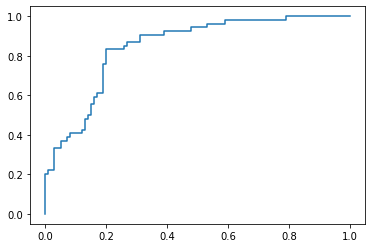

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# def roc_curve_plot(y_test, pred_porba_c1) :
#     fprs,tprs, thresholds = roc_curve(y_test, pred_proba_c1)
#     plt.plot(fprs, tprs, label='ROC')
#     plt.plot([0,1],[0,1], 'k--', label='Random')
    
#     start, end = plt.xlim()
#     plt.xticks(np.round(np.arange(start, end, 0.1), 2))
#     plt.xlim(0,1)
#     plt.ylim(0,1)
#     plt.xlabel('FPR(1-specificity')
#     plt.ylabel('TPR(Recall)')
#     plt.legend()
#     plt.show()
# roc_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])


import matplotlib.pyplot as plt
def curve(y_test, dpred_proba):
    fprs, tprs, thresholds = roc_curve(y_test, dpred_proba)
    plt.plot(fprs, tprs, label='ROC')

curve(y_test, dpred_proba)

## 선생님 답안 

[과제]

- diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.

- SkinThickness 와 Insulin의 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체 .zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가
※ 피처 정보
'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압), 'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린), 'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('/Users/joy/Documents/GitHub/0Oong/수업내용/dataset/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=156)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]


print('전처리 전 평가지표 반영 :')

# 평가지표함수
def get_clf_eval(y_test, pred, pred_proba) :
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred_proba)
    confusion = confusion_matrix(y_test, pred)
    print('혼돈함수 : \n', confusion )
    print()
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, f1 : {:.4f}, AUC : {:.4f}'.format(accuracy, precision, recall, f1, auc))


get_clf_eval(y_test, pred, pred_proba)



전처리 전 평가지표 반영 :
혼돈함수 : 
 [[84 13]
 [24 33]]

정확도 : 0.7597, 정밀도 : 0.7174, 재현율 : 0.5789, f1 : 0.6408, AUC : 0.8412


In [16]:
# 데이터 살펴보기
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
# 결측값대신 0이 들어간 것들 몇개씩 들어갔는지 찾기
features = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

total = df.Glucose.count()

for feature in features:
    zero = df[df[feature]==0][feature].count()
    print('{} 0인 건수는 {}, 퍼센트 {:.2f}%'.format(feature, zero, 100*zero/total))
    print()

Pregnancies 0인 건수는 111, 퍼센트 14.45%

Glucose 0인 건수는 5, 퍼센트 0.65%

BloodPressure 0인 건수는 35, 퍼센트 4.56%

SkinThickness 0인 건수는 227, 퍼센트 29.56%

Insulin 0인 건수는 374, 퍼센트 48.70%

BMI 0인 건수는 11, 퍼센트 1.43%



In [30]:
# 0을 평균치로 다 대체해주기

for feature in features:
    df[feature].replace(0, df[feature].mean(), inplace=True)

for feature in features:
    zero = df[df[feature]==0][feature].count()
    print('{} 0인 건수는 {}, 퍼센트 {:.2f}%'.format(feature, zero, 100*zero/total))
    print()

Pregnancies 0인 건수는 0, 퍼센트 0.00%

Glucose 0인 건수는 0, 퍼센트 0.00%

BloodPressure 0인 건수는 0, 퍼센트 0.00%

SkinThickness 0인 건수는 0, 퍼센트 0.00%

Insulin 0인 건수는 0, 퍼센트 0.00%

BMI 0인 건수는 0, 퍼센트 0.00%



In [32]:
# 전처리 후 평가지표 적용하기
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=156)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

혼돈함수 : 
 [[83 14]
 [27 30]]

정확도 : 0.7338, 정밀도 : 0.6818, 재현율 : 0.5263, f1 : 0.5941, AUC : 0.8305


In [50]:
# 그래프 그리기 : 보고하기
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)

    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()  #축의 한계
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold_value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()

    # print(threshold_boundary)
    # print(thresholds)
    # print(thresholds.shape)
    print(precisions)
    print(precisions.shape)


[0.42222222 0.41791045 0.42105263 0.42424242 0.42748092 0.43076923
 0.43410853 0.4375     0.44094488 0.44444444 0.44       0.44354839
 0.44715447 0.45081967 0.45454545 0.45833333 0.46218487 0.46610169
 0.47008547 0.47413793 0.47826087 0.48245614 0.48672566 0.49107143
 0.4954955  0.5        0.50458716 0.50925926 0.5046729  0.50943396
 0.51428571 0.51923077 0.52427184 0.52941176 0.53465347 0.54
 0.53535354 0.54081633 0.54639175 0.55208333 0.55789474 0.56382979
 0.56989247 0.56521739 0.57142857 0.57777778 0.58426966 0.57954545
 0.57471264 0.58139535 0.58823529 0.5952381  0.59036145 0.58536585
 0.59259259 0.5875     0.59493671 0.58974359 0.5974026  0.60526316
 0.6        0.59459459 0.60273973 0.61111111 0.6056338  0.61428571
 0.60869565 0.61764706 0.6119403  0.62121212 0.61538462 0.625
 0.61904762 0.62903226 0.63934426 0.63333333 0.6440678  0.65517241
 0.66666667 0.67857143 0.67272727 0.66666667 0.66037736 0.65384615
 0.66666667 0.68       0.67346939 0.6875     0.68085106 0.67391304
 0.688

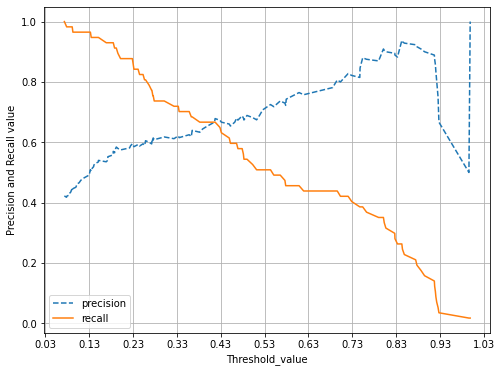

In [51]:
pred_proba = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba)

In [58]:
# 임계값 조절 : 보고하기
from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test, pred_proba, thresholds):
    for threshold in thresholds : 
        binarizer = Binarizer(threshold=threshold).fit(pred_proba)
        custom_predict=binarizer.transform(pred_proba)
        print('임계값 : ', threshold)
        get_clf_eval(y_test, custom_predict, pred_proba)

In [59]:
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 :  0.3
혼돈함수 : 
 [[71 26]
 [15 42]]

정확도 : 0.7338, 정밀도 : 0.6176, 재현율 : 0.7368, f1 : 0.6720, AUC : 0.8305
임계값 :  0.33
혼돈함수 : 
 [[72 25]
 [16 41]]

정확도 : 0.7338, 정밀도 : 0.6212, 재현율 : 0.7193, f1 : 0.6667, AUC : 0.8305
임계값 :  0.36
혼돈함수 : 
 [[73 24]
 [18 39]]

정확도 : 0.7273, 정밀도 : 0.6190, 재현율 : 0.6842, f1 : 0.6500, AUC : 0.8305
임계값 :  0.39
혼돈함수 : 
 [[77 20]
 [19 38]]

정확도 : 0.7468, 정밀도 : 0.6552, 재현율 : 0.6667, f1 : 0.6609, AUC : 0.8305
임계값 :  0.42
혼돈함수 : 
 [[79 18]
 [20 37]]

정확도 : 0.7532, 정밀도 : 0.6727, 재현율 : 0.6491, f1 : 0.6607, AUC : 0.8305
임계값 :  0.45
혼돈함수 : 
 [[79 18]
 [23 34]]

정확도 : 0.7338, 정밀도 : 0.6538, 재현율 : 0.5965, f1 : 0.6239, AUC : 0.8305
임계값 :  0.48
혼돈함수 : 
 [[82 15]
 [25 32]]

정확도 : 0.7403, 정밀도 : 0.6809, 재현율 : 0.5614, f1 : 0.6154, AUC : 0.8305
임계값 :  0.5
혼돈함수 : 
 [[83 14]
 [27 30]]

정확도 : 0.7338, 정밀도 : 0.6818, 재현율 : 0.5263, f1 : 0.5941, AUC : 0.8305
